# 网络的相关性图绘制

Jul 18, 2024

环形图（Circular graphs）是一种网络图，其中节点在视觉上排列成圆形布局。
在复杂网络学科中，经常会使用环形图表示网络中节点的相关性。



![网络的相关性图绘制](network_corr_plot.png)

图1 全球股票市场的指数之间在三个时刻（危机前、中、后）的关联性。

如何绘制环形图，在python中可以使用networkx等工具绘制。

但是有时候，为了更灵活的掌控绘图结果，更好的适配数据，最好还是自己来编程绘图。下面是使用matplotlib来绘图绘制网络的相关性图：

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica",
#     "font.size":10
# })

In [17]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [18]:
def sin(degree):
    # degree=30, return 1/2
    # degree=90, return 1
    return np.sin(degree/90*0.5*np.pi)

In [19]:
def circle(center, radius, vertex):
    x, y = center
    theta = np.linspace(0, 2*np.pi, vertex+1)
    a = radius*np.cos(theta)+x
    b = radius*np.sin(theta)+y
    return a, b

In [36]:
class NetworkPlot():
    def __init__(self, ncols=1):
        self.figure, self.axes = plt.subplots(nrows=1,ncols=ncols, figsize=(18,6))
    
    
    
    def plot_network(self, adj_matrix, axes, config, title=None, legend_label=None):
        ## 参数===========================
        # plot
        figsize = config['plot']['figsize']


        # circle
        circle_radius = config['circle']['circle_radius']
        circle_center = config['circle']['circle_center']
        angle = config['circle']['angle']



        ## 绘图===========================
        # plot big circle
        vertex_x, vertex_y = circle(center=config['circle']['circle_center'],
                      radius=config['circle']['circle_radius'], 
                      vertex=adj_matrix.shape[0])
        

        # plot vertices circle
        for i in range(adj_matrix.shape[0]):
            x,y= circle(center=(vertex_x[i], vertex_y[i]),
                  radius=config['vertex']['vertex_radius'],
                  vertex=10)
            axes.plot(x, y, color=config['vertex']['vertex_color'])

        # add vertex_labels
        for i, label in enumerate(adj_matrix.index):
            if vertex_x[i]>0:
                props = {'ha': 'left', 'va': 'center'}
            else:
                props = {'ha': 'right', 'va': 'center'}

            axes.text(vertex_x[i]+2.*(vertex_x[i]/abs(vertex_x[i]))*config['vertex']['vertex_radius'],
                          vertex_y[i],
                          '%s' %label, 
                          props,
                          fontsize=config['vertex']['vertex_label_fontsize'],
                          rotation=config['vertex']['vertex_label_angle'],
                          rotation_mode='anchor')

        # add edges
        for i, x in enumerate(adj_matrix.index):
            for j, y in enumerate(adj_matrix.columns):
                if adj_matrix.loc[x, y]==1:
                    l1, =axes.plot([vertex_x[i], vertex_x[j]],[vertex_y[i], vertex_y[j]],
                             color=config['edge']['edge_color'],
                             linewidth= 0.5, #adj_matrix.loc[x, y],
                             linestyle='-', #config['edge']['edge_style'],
                            alpha=0.8)

                elif adj_matrix.loc[x, y]==2:
                    l2, =axes.plot([vertex_x[i], vertex_x[j]],[vertex_y[i], vertex_y[j]],
                             color=config['edge']['edge_color'],
                             linewidth= 2, #adj_matrix.loc[x, y],
                             linestyle='-', #config['edge']['edge_style'],
                            alpha=0.8)
                    
        # render figure
        #axes.set_aspect(1)
        # axis
        axes.set_xticks([-10, 10])
        axes.set_yticks([-12, 10])
        axes.axis('off')
        #if title is not None:
        #    axes.set_title()
        if legend_label is not None:
            axes.legend(loc='lower center',
                        ncol=2,
                        handles=[l1, l2], 
                        labels=legend_label, 
                        fontsize=12,
                       edgecolor='black',
                       shadow=False,
                       frameon=False)

        
    def savefig(self, file_name):
        self.figure.savefig(file_name, dpi=300)

In [37]:
config = {'plot': {
                'figsize':(12,12),
                  },
          'circle':{
               'circle_radius':9,
                'circle_center': (0, 0),
                'angle': 360},
            'vertex':{
                'vertex_radius': 0.25,
                'vertex_color': 'red',
                'vertex_label_angle': 0,
                'vertex_label_fontsize': 12},
            'edge':{
                'edge_color': 'green',
                'edge_style': '-', #'-', '--', '-.', ':'
                'edge_width': 0.1}
         }

In [38]:
# adj_matrix
import pandas as pd
list_df = pd.read_excel('datasets/指数数据表.xlsx', dtype={'指数编码':np.str_}, index_col='指数编码')
#list_df = list_df[list_df['select'] == 'v']
l = []
for i in list_df.index.astype(np.str_):
    if i == 'S&P500':
        i = 'S\&P500'
    l.append(i)
list_df.index = l

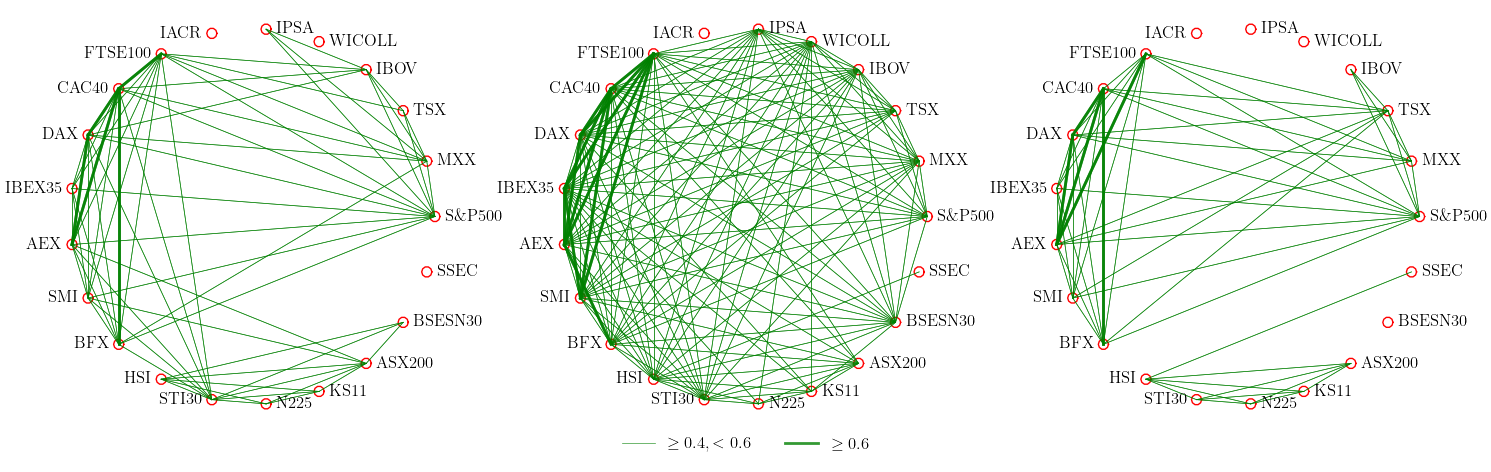

In [39]:
nwp = NetworkPlot(3)
date1 = '2007-06-29'
date2 = '2009-06-25'
date3 = '2011-06-29'
    
for i, date in enumerate([date1, date2, date3]):
    adj_matrix = pd.read_csv('output/21nodes_200day_p4_q2/adjacent_matrix/%s.csv' %date, index_col=0)
    adj_matrix = adj_matrix.loc[list_df['指数名称']]
    adj_matrix = adj_matrix.loc[:, list_df['指数名称']]
    #adj_matrix.index = ['%s(%s)' %(list_df.index[i], list_df['国家全称'][i]) for i in range(list_df.shape[0])]
    adj_matrix.index = ['%s' %(list_df.index[i]) for i in range(list_df.shape[0])]
    adj_matrix[adj_matrix<0.35]=0
    adj_matrix[adj_matrix>=0.6]=2
    adj_matrix[(adj_matrix>=0.35) * (adj_matrix<0.6)]=1
    if i==1:
        legend_label=[r'$\geq 0.4, < 0.6$',  r"$\geq 0.6$"]
    else:
        legend_label=None
    nwp.plot_network(adj_matrix, axes=nwp.axes[i], config=config, title=date, legend_label=legend_label)

nwp.savefig('images/network_2006_2012.pdf')